# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
# EXAMPLE PYTHON CELL

df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,91,14
1,44,72
2,16,6
3,10,99
4,81,87


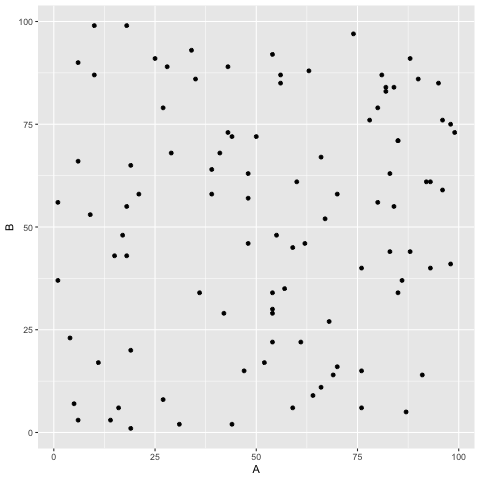

In [8]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Load the data

In [9]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [10]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




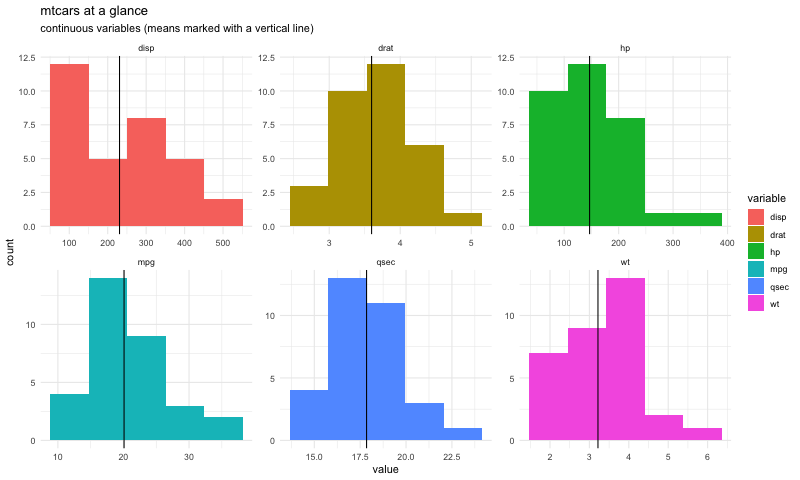

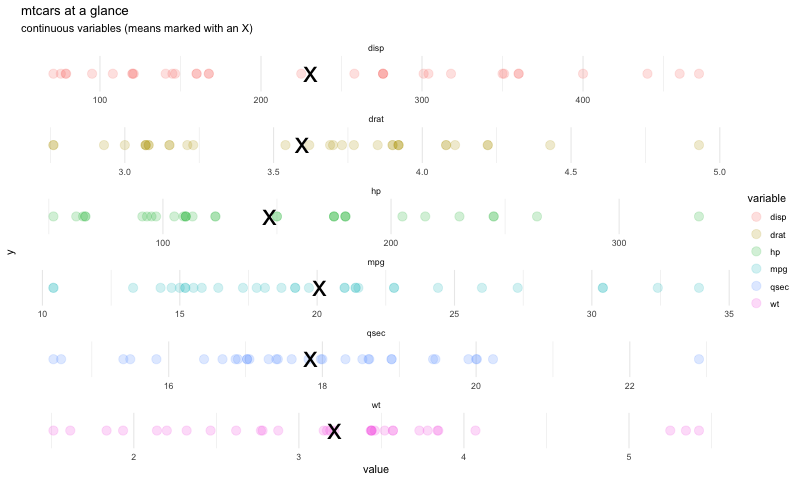

In [15]:
%%R -w 800

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

# plot only continuous variables
to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)

histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

plot_continuous_histograms <- ggplot(to_plot) +
    aes(x=value, fill=variable, group=variable) +
    geom_histogram(bins=5) +
    geom_vline(data=histogram_means, aes(xintercept=mean)) +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='continuous variables (means marked with a vertical line)')


plot_continuous_dotplot <- ggplot(to_plot) +
    aes(x=value, y=1, color=variable) +
    geom_point(size=4, alpha=.2) +
    stat_summary(fun.y= mean, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    facet_wrap(~variable, scales='free', ncol=1) +
    theme_minimal() +
    labs(
        title = 'mtcars at a glance', 
        subtitle='continuous variables (means marked with an X)'
    ) +
    theme(
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank(),  #remove y axis ticks
            panel.grid.major.y = element_blank(), #remove y axis grid
            panel.grid.minor.y = element_blank(), #remove y axis grid
    )

plot_continuous_histograms
plot_continuous_dotplot

# display both plots
print(plot_continuous_histograms)
print(plot_continuous_dotplot)

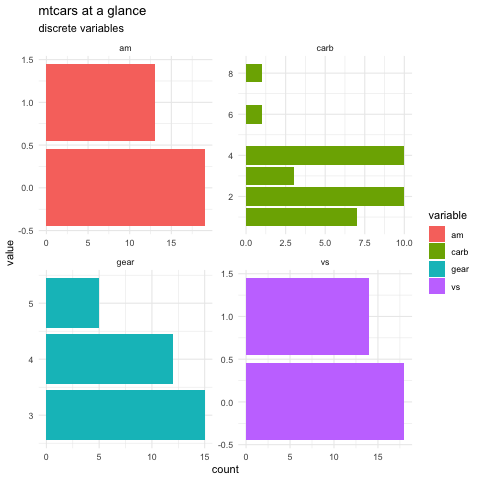

In [76]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

👉 What can we conclude about this dataset from the charts above?

1. The average displacement overestimates the displacement achieved by nearly half the number of cars in this dataset with 5 as the bin size.
2. There are more number of manunal cars in this dataset than there are automatic cars.
3. The number of 3 geared cars is nearly as much as 4-geared and 5-geared put together.
4. There are more car with V-shaped engine cylinders than straight-shaped engine cylinders.

👉 What can we not conclude about this dataset from the charts above?

1. Cannot conclude the number of automatic and manual cars based on number of gears as 4 geared car can be automatic or manual.
2. Based on just these charts, we cannot make statements about relation between displacement and number of carburetors.
3. Can draw relation shape of cylinder geometry and displacement.
* NOTE: I'm assuming displacement as a metric of power instead of horsepower as per the documentation which states that gross horsepower maybe misleading in data of cars before 1970 (which is mtcars timeline)

👉 What further questions about this data do you have now? 

* ASSUMPTION: gross horsepower is misleading.
* STEP1: Which cars stand where if we are making a scatterplot with x=cyl, y=disp, size=carb, and color=vs.
* STEP2: The cars that are bigger in size and on the upper right corner of the plot: what is their gross horsepower?
* STEP3: This will help us know if horsepower data is truly misleading. Or if we do not take the assumption into consideration and rather use it as a metric of correctness, it will show if our analysis is heading in the right direction. 

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


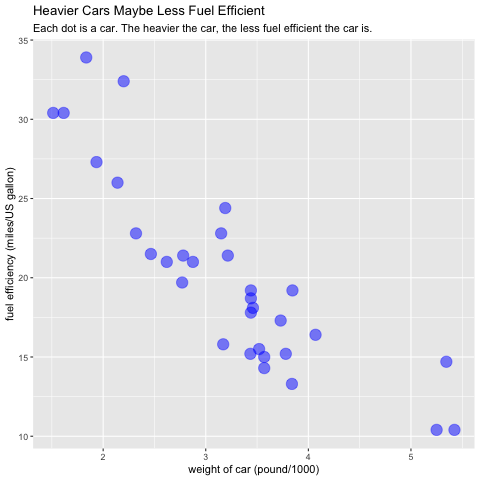

In [24]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=wt) +
    geom_point(size=5, color='blue', alpha=0.5) +
    labs(x="weight of car (pound/1000)", y="fuel efficiency (miles/US gallon)", title="Heavier Cars Maybe Less Fuel Efficient", subtitle="Each dot is a car. The heavier the car, the less fuel efficient the car is.")

# 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight: Each dot is a car. The heavier the car, the less fuel efficient the car is.

    b. What can't we conclude about fuel efficiency and weight: We cannot conclude that it is the weight of the car that is causing decrease in fuel efficiency.

    c. What further questions do you have about this data?: How exactly does weight affect the car's performance? What else will we need to consider to conclude that remains unaffected by weight?

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


In [28]:
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [33]:
mtcars.disp.mean().round(0)

231.0

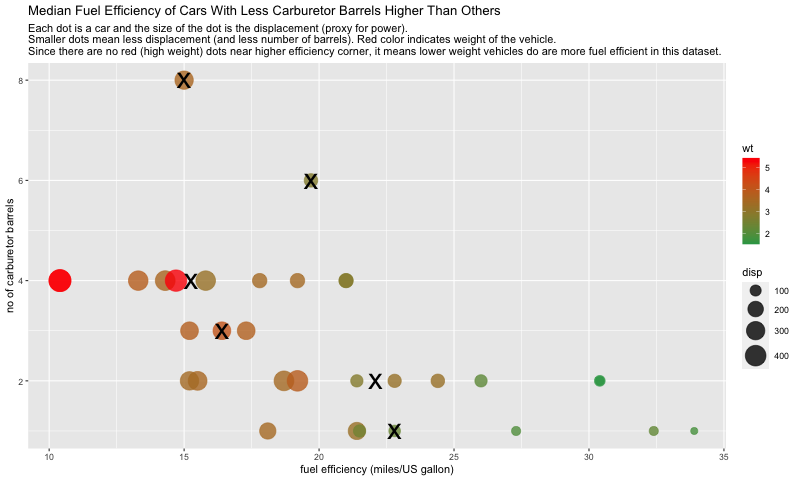

In [104]:
%%R -w 800

ggplot(mtcars) +
    aes(y=carb, x=mpg, size=disp, color=wt) +
    geom_point(alpha=0.8) + scale_color_gradient(low="#31a354", high="red") + 
    scale_size(range = c(3, 10)) +
    stat_summary(fun=median, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    labs(x="fuel efficiency (miles/US gallon)", y="no of carburetor barrels", title="Median Fuel Efficiency of Cars With Less Carburetor Barrels Higher Than Others", subtitle="Each dot is a car and the size of the dot is the displacement (proxy for power). \nSmaller dots mean less displacement (and less number of barrels). Red color indicates weight of the vehicle. \nSince there are no red (high weight) dots near higher efficiency corner, it means lower weight vehicles do are more fuel efficient in this dataset.")

## Part 2 (freeform inquiry)
Ask and try to answer your own questions about the dataset. Make at least two such charts below:


# 👉 Question 1: If displacement can show power (as per documentation), what is the relation between gross horsepower and dispalcement?

### 👉 Charts or summary statistics to help answer your question

In [116]:
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


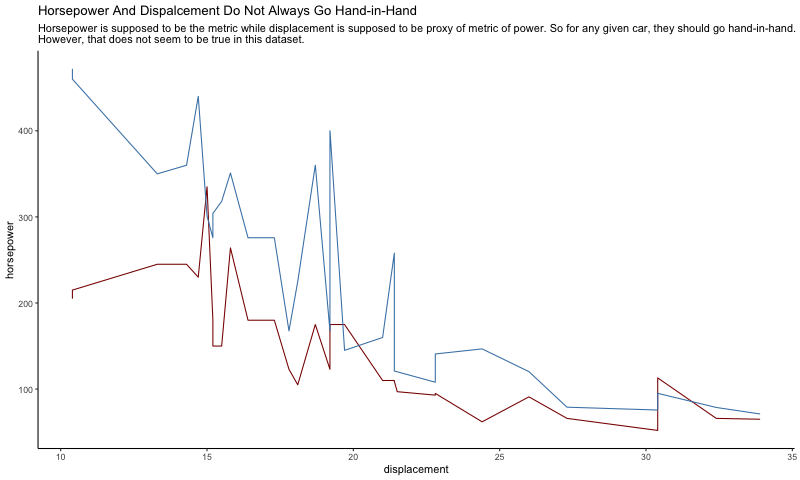

In [155]:
%%R -w 800

ggplot(mtcars, aes(x=mpg)) + 
  geom_line(aes(y = hp), color="darkred") + 
  geom_line(aes(y = disp), color="steelblue") +
  theme_classic() + labs(x="displacement", y='horsepower', title="Horsepower And Dispalcement Do Not Always Go Hand-in-Hand",
                        subtitle="Horsepower is supposed to be the metric while displacement is supposed to be proxy of metric of power. So for any given car, they should go hand-in-hand.\nHowever, that does not seem to be true in this dataset.")

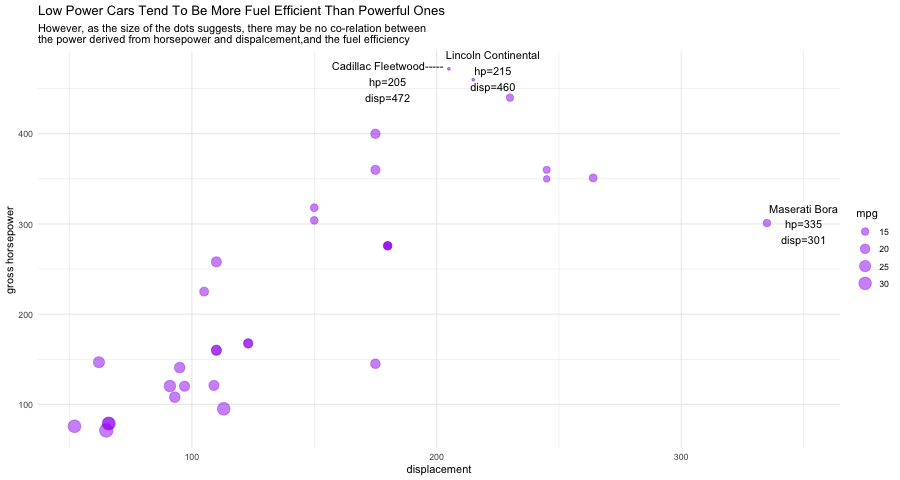

In [153]:
%%R -w 900

ggplot(mtcars, aes(x=hp, y=disp, size=mpg)) + 
  geom_point(color="purple", alpha=0.5) +
  theme_minimal() +
  annotate("text", x=350, y=300, label="Maserati Bora\nhp=335\ndisp=301", color="black") +
  annotate("text", x=180, y=458, label="Cadillac Fleetwood-----\nhp=205\ndisp=472", color="black") +
  annotate("text", x=223, y=470, label="Lincoln Continental\nhp=215\ndisp=460", color="black") +
  labs(x='displacement', y='gross horsepower', title="Low Power Cars Tend To Be More Fuel Efficient Than Powerful Ones",
      subtitle="However, as the size of the dots suggests, there may be no co-relation between \nthe power derived from horsepower and dispalcement,and the fuel efficiency")

### 👉 Reflection

a. What can we conclude?
-Heavier vehicles tend to have less fuel efficiency.
-Horsepower recording OR displacement recording of cars MIGHT have been faulty before 1970 (I maybe completely off here).
-Displacement and curburator barrel count go hand-in-hand; lower the displacement, higher the fuel efficiency.

b. What can't we conclude?
-That higher displacement means higher horsepower. 
-That heavy vehicles cannot be fuel efficient.
-That dispalcement and horsepower are inter-related in this dataset.

c. What further questions does this analysis raise?
-What does the relation between horsepower and dispalcement mean?